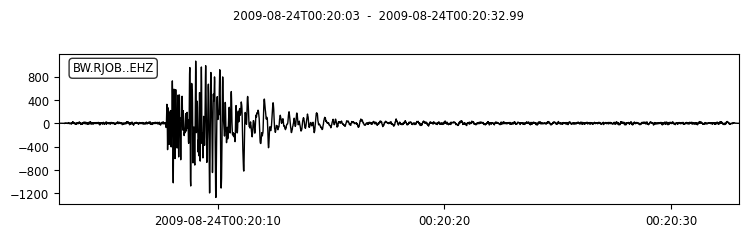

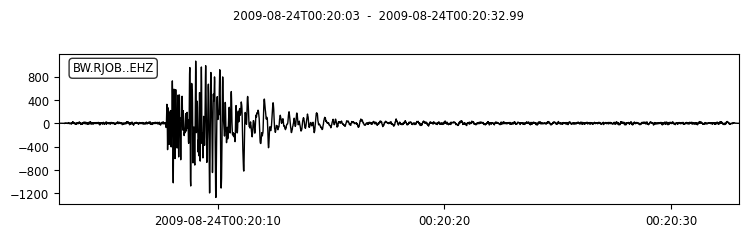

In [1]:
from obspy import read
st = read()  # load example seismogram
st.filter(type='highpass', freq=3.0)
st = st.select(component='Z')
st.plot()

In [5]:
smpl_file

file = open

'.\\data\\STRYDE_SEGDv3_Read_Pack_v1.4combed_and_correlated_receiver_gather_example_1trace.segd'

In [7]:
from pathlib import Path
data = Path(smpl_file).read_bytes()

In [30]:
data[0:130]

b'\xff\xff\x80X\x00\x00H\x91\x00\x00 \x913\x14\x084"`\x02\x00\x00\x00\xff\x00\x00\x1f\xff\x01\x01\x00\x00\x00\x00\')\x00\x01\x00\x00\x00\x00\x00\x03\x00\x00\x00\x00\x00\x00[\x8d\x80\x00\x00\x00\t\x00\x07\xd0\x00\x00\x00\x00\x02\x00\x04\x86\x15\xb6\x18\xea`\x00\x00\x00\x00\x00\x001\x94\x00\x00\x00\x00\x00\x001\x94\x00\x00\x01\xa0\x00\x00\x00\x03\x00\x00\x0b\x00\x00\t\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x06\x00\x00\x00\x00\x1b\xea|\x00\x00\x06@\x17\xb3'

In [9]:
with open(smpl_file, mode='rb') as file: # b is important -> binary
    fileContent = file.read()

In [10]:
fileContent

b'\xff\xff\x80X\x00\x00H\x91\x00\x00 \x913\x14\x084"`\x02\x00\x00\x00\xff\x00\x00\x1f\xff\x01\x01\x00\x00\x00\x00\')\x00\x01\x00\x00\x00\x00\x00\x03\x00\x00\x00\x00\x00\x00[\x8d\x80\x00\x00\x00\t\x00\x07\xd0\x00\x00\x00\x00\x02\x00\x04\x86\x15\xb6\x18\xea`\x00\x00\x00\x00\x00\x001\x94\x00\x00\x00\x00\x00\x001\x94\x00\x00\x01\xa0\x00\x00\x00\x03\x00\x00\x0b\x00\x00\t\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x06\x00\x00\x00\x00\x1b\xea|\x00\x00\x06@\x17\xb3\x02#\x02\x0eeu\x1d\x8e\x13"\x01\x1d\xf4\xfd\x01We\x18\x00\x00\x00\x00\x00\x00\x00\x00UnQ\xec\x17\xb3\x02$\x02\x0eeu\x1d\x8e\x13#\x00\x00\x00\x02>\x99\x99\x9a\x00\x00\x00\x01>\xcc\xcc\xcdUnQ\xeb\x17\xb3\x02$\x02\x0eeu\x1d\x8e\x13#\x01\x1d\xf4\xfd\x01We\x18\x00\x00\x00\x00\x00\x00\x00\x00UnQ\xed\x89\x18\xf1\xd5\x00\x001\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00ChT\xee\x00\x00\xf9\xcd\x00\x00E\x81\x02\xf5*q\x1e\x9cA\xd5\x17\xb3R\xf9\x02\x0e\xc8\xe7\x1d\x8d\xeb\xdc\x05\x031\xd1?1 \x

In [85]:
fp = open(smpl_file, 'rb')
buf = fp.read(32)
fp.close()

In [100]:
def _bcd(byte):
    """Decode 1-byte binary code decimals."""

    if isinstance(byte, str):
        try:
            byte = ord(byte)
        except TypeError:
            raise ValueError('not a byte')
    elif isinstance(byte, int):
        if byte > 255:
            raise ValueError('not a byte')

    else:
        raise ValueError('not a byte')
    v1 = byte >> 4
    v2 = byte & 0xF
    return v1, v2

def _decode_bcd(bytes_in):
    """Decode arbitrary length binary code decimals."""
    v = 0
    if isinstance(bytes_in, int):
        bytes_in = bytes([bytes_in])
        disp('bytes in')
    n = len(bytes_in)
    n = n*2 - 1  # 2 values per byte
    for byte in bytes_in:
        v1, v2 = _bcd(byte)
        v += v1*10**n + v2*10**(n-1)
        n -= 2
    return v


In [106]:
'abcd' >> 2

TypeError: unsupported operand type(s) for >>: 'str' and 'int'

In [101]:
file_number = _decode_bcd(buf[0:2])
_format_code = _decode_bcd(buf[2:4])

255
255
128
88


In [102]:
print(file_number)
print(_format_code)

16665
8058


In [99]:
isinstance(buf[0], str)

False

In [92]:
_format_code

8058

In [12]:
import struct
struct.unpack("i" * ((len(fileContent) -24) // 4), fileContent[20:-4])

(16711680,
 33496832,
 1,
 2696960,
 1,
 196608,
 0,
 -2138219776,
 150994944,
 13633280,
 33554432,
 361104384,
 1625954486,
 0,
 -1808728064,
 0,
 -1808728064,
 -1610547200,
 50331648,
 720896,
 2304,
 0,
 0,
 0,
 6,
 2095717120,
 1074135040,
 587379479,
 1969556994,
 571706909,
 -34333439,
 409294593,
 0,
 0,
 -330207659,
 604156695,
 1969556994,
 588484125,
 33554432,
 -1701209794,
 16777216,
 -842216386,
 -346984875,
 604156695,
 1969556994,
 588484125,
 -34333439,
 409294593,
 0,
 0,
 -313430443,
 -705619831,
 3211264,
 0,
 0,
 0,
 0,
 0,
 -296458173,
 -839319552,
 -2126184448,
 1898640642,
 -717120482,
 -112020713,
 -406319614,
 -588542691,
 -785317115,
 -501206721,
 13391939,
 181871420,
 -1157811905,
 22083,
 181871420,
 1,
 -805306368,
 268500993,
 0,
 -2138219776,
 -1207238656,
 1044841780,
 65536,
 134336519,
 805306371,
 0,
 63,
 0,
 36929,
 0,
 0,
 0,
 822085120,
 0,
 1919295578,
 1663069551,
 1952802152,
 1847617633,
 6644847,
 0,
 838860800,
 16908287,
 256,
 2048,
 0,


In [84]:
fileContent[0].format(b)

AttributeError: 'int' object has no attribute 'format'

In [80]:
header1 = fileContent[0:32]
header2 =

b'\xff\xff\x80X\x00\x00H\x91\x00\x00 \x913\x14\x084"`\x02\x00\x00\x00\xff\x00\x00\x1f\xff\x01\x01\x00\x00\x00'

In [69]:
fileContent[5:6].fromhex('HexValue').decode('utf-8')

ValueError: non-hexadecimal number found in fromhex() arg at position 0

In [41]:
fileContent.r

5800191

In [56]:
i = int.from_bytes(fileContent[2:4], byteorder='big', signed=False)
i

32856

In [81]:
from obspy.io.segy.core import _read_segy
from obspy.core.util import get_example_file
filename = get_example_file("00001034.sgy_first_trace")
st = _read_segy(filename)
st

1 Trace(s) in Stream:
Seq. No. in line:    1 | 2009-06-22T14:47:37.000000Z - 2009-06-22T14:47:41.000000Z | 500.0 Hz, 2001 samples

In [109]:
buf[2:4]

b'\x80X'

In [111]:
from struct import unpack

unpacked = unpack('i', buf[2:4])

error: unpack requires a buffer of 4 bytes